# Expected allele frequency genetic drift

## (1) Over one generation

We assume to have 50 diploid individuals and an allele frequency of 0.50.

In [ ]:
N <- 50
fA <- 0.5

A binomial distribution models the sampling with replacement of gene copies.
The next cells illustrate how to perform a random sampling from a binomial distribution with 2N samples and probability of "success" equal to $f_A$. Since we are interested in frequencies and not counts, we then divide by 2N.

In [ ]:
rbinom(1, 2*N, fA) / (2*N)

In [ ]:
rbinom(1, 2*N, 0.53) / (2*N)

In [ ]:
rbinom(1, 2*N, 0.56) / (2*N)

In [ ]:
rbinom(1, 2*N, 0.67) / (2*N)

If we assume to repeat the experiment many times and calculate the average frequency, then...

  [1] 0.53 0.46 0.54 0.55 0.49 0.45 0.55 0.50 0.53 0.55 0.51 0.46 0.52 0.51 0.47
 [16] 0.46 0.54 0.52 0.50 0.41 0.50 0.54 0.53 0.50 0.41 0.45 0.40 0.57 0.55 0.46
 [31] 0.50 0.53 0.52 0.41 0.48 0.44 0.40 0.59 0.41 0.48 0.60 0.52 0.57 0.44 0.46
 [46] 0.57 0.54 0.53 0.44 0.54 0.54 0.48 0.48 0.53 0.46 0.53 0.49 0.54 0.61 0.45
 [61] 0.53 0.38 0.46 0.42 0.47 0.54 0.53 0.43 0.46 0.55 0.49 0.53 0.54 0.52 0.54
 [76] 0.45 0.42 0.50 0.51 0.50 0.43 0.47 0.61 0.50 0.51 0.44 0.54 0.56 0.53 0.49
 [91] 0.53 0.54 0.57 0.49 0.42 0.49 0.48 0.50 0.55 0.46


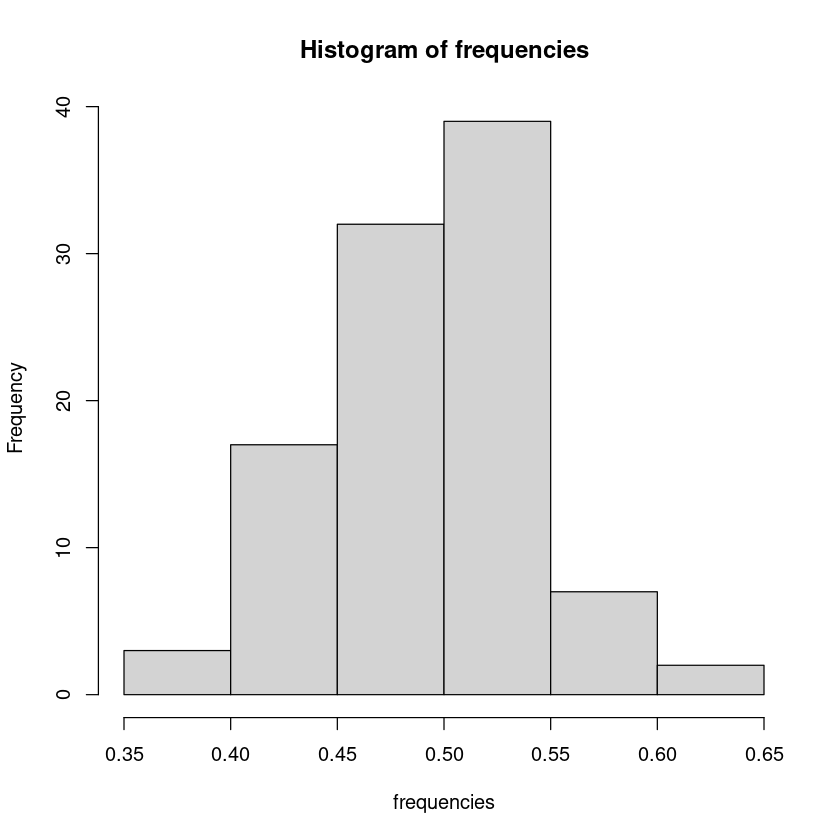

In [1]:
N <- 50
fA <- 0.5
frequencies <- rbinom(100, 2*N, fA) / (2*N)
print(frequencies)
hist(frequencies)

In [2]:
mean( rbinom(100, 2*N, fA) / (2*N) )

[1] 0.4966

In [ ]:
mean( rbinom(1e5, 2*N, fA) / (2*N) )

meaning that after a generation the expected allele frequency does not change.

## (2) Over many generations

Scenario similar to above, but with a starting allele frequency of 0.50, 50 diploid individuals and 100 generations.

In [3]:
N <- 50
# 100 generations
fA <- rep(NA, 100)
# at t=0
fA[1] <- 0.50

We repeat the sampling procedure at each generation.

In [4]:
for (t in 1:99) fA[t+1] <- rbinom(1, 2*N, fA[t]) / (2*N)

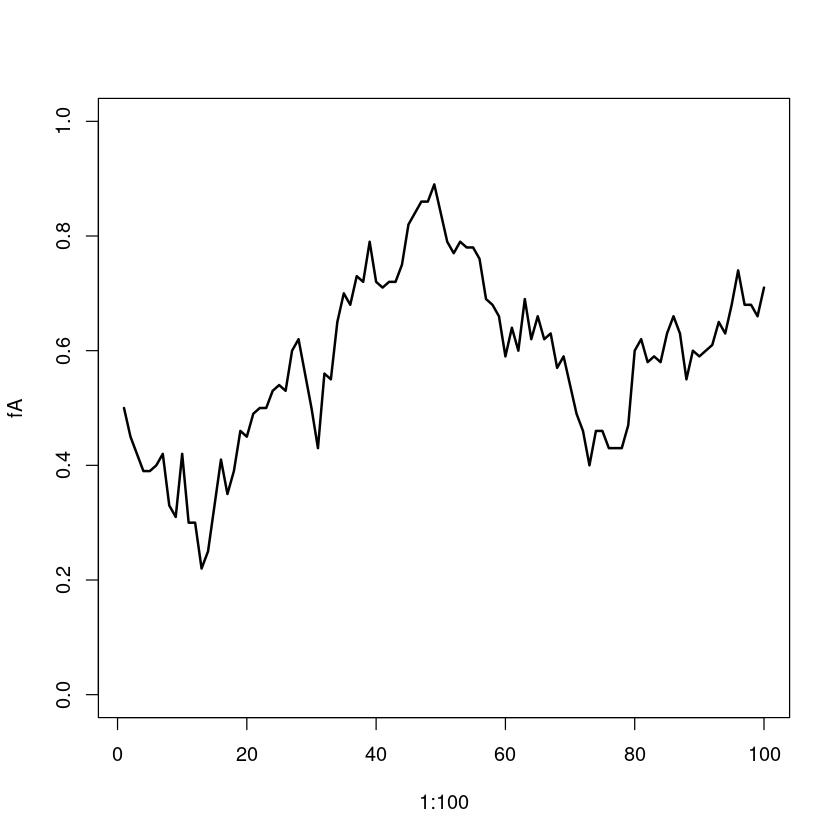

In [5]:
plot(x=1:100, y=fA, type="l", ylim=c(0,1), lwd=2)

Wasn't the expected allele frequency supposed not to change after each generation? What's happening?

Let's assume that we repeat the whole history for 100 generations many times (i.e. 20) and record the trajectory of the allele frequency.

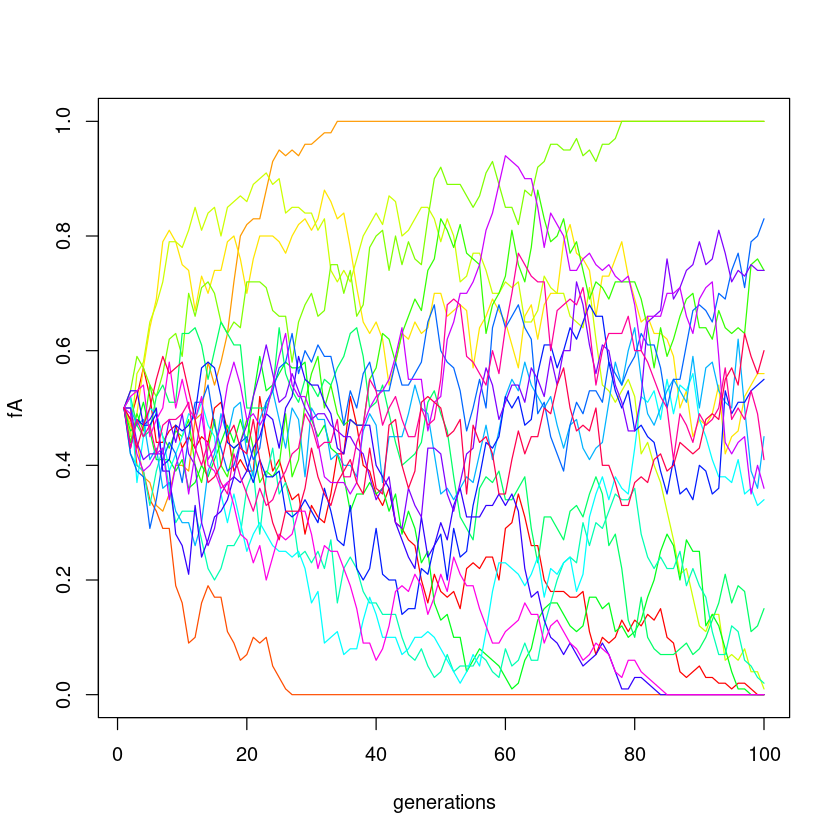

In [6]:
N <- 50
for (j in 1:20) {
    fA <- rep(NA, 100)
    fA[1] <- 0.5
    for (t in 1:99) fA[t+1] <- rbinom(1, 2*N, fA[t]) / (2*N)
    if (j==1) plot(x=1:100, y=fA, xlab="generations", type="l", ylim=c(0,1), col=rainbow(20)[j]) else lines(x=1:100, y=fA, col=rainbow(20)[j])
}

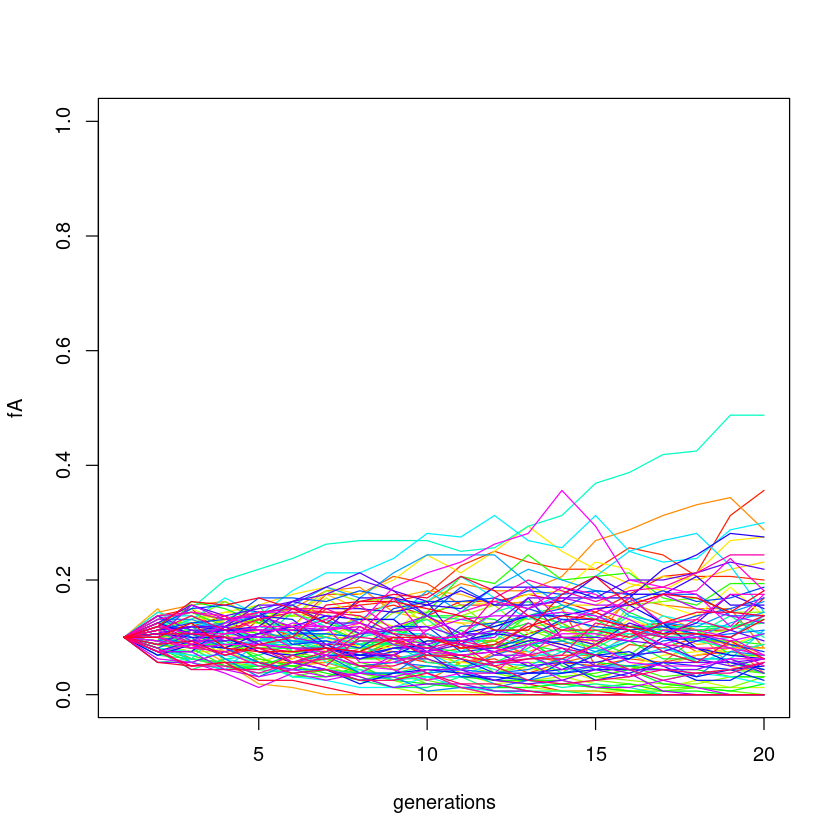

In [2]:
N <- 80
gen <- 20 # generations
nrepl <- 100 # number of distinct simulations
for (j in 1:nrepl) {
    fA <- rep(NA, gen)
    fA[1] <- 0.1
    for (t in 1:(gen-1)) fA[t+1] <- rbinom(1, 2*N, fA[t]) / (2*N)
    if (j==1) plot(x=1:gen, y=fA, xlab="generations", type="l", ylim=c(0,1), col=rainbow(nrepl)[j]) else lines(x=1:gen, y=fA, col=rainbow(nrepl)[j])
}

What is the chance that an allele at 50% at time 0 goes to fixation (100%) or is lost (0%)? To answer this question run the experiment above over more generations and more replicate and see what happens. Calculate the proportion of alleles that are fixed or lost at the end of your experiment. What happens if you change the initial allele frequency? Do these proportions change?

In [ ]:
N <- 50
gen <- 1000 # generations
nrepl <- 200 # number of distinct simulations
for (j in 1:nrepl) {
    fA <- rep(NA, gen)
    fA[1] <- 0.5
    for (t in 1:(gen-1)) fA[t+1] <- rbinom(1, 2*N, fA[t]) / (2*N)
    if (j==1) plot(x=1:gen, y=fA, xlab="generations", type="l", ylim=c(0,1), col=rainbow(nrepl)[j]) else lines(x=1:gen, y=fA, col=rainbow(nrepl)[j])
}

## (3) Effect of population size

Let's consider the effect of population size on the drift process.

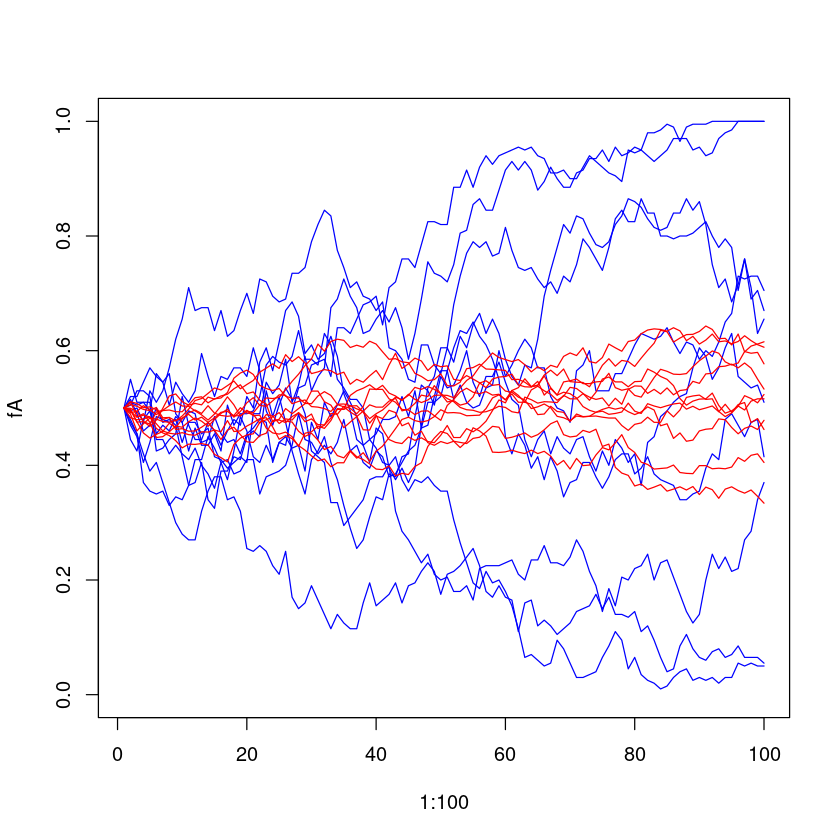

In [8]:
# small population (blue)
N <- 100
for (j in 1:10) {
    fA <- rep(NA, 100); fA[1] <- 0.5
    for (t in 1:99) fA[t+1] <- rbinom(1, 2*N, fA[t]) / (2*N)
    if (j==1) plot(x=1:100, y=fA, type="l", ylim=c(0,1), col="blue") else lines(x=1:100, y=fA, col="blue")
}

# large population (red)
N <- 1000
for (j in 1:10) {
    fA <- rep(NA, 100); fA[1] <- 0.5
    for (t in 1:99) fA[t+1] <- rbinom(1, 2*N, fA[t]) / (2*N)
    lines(x=1:100, y=fA, col="red")
}

In [ ]:
rbinom(1, 20, 0.5) / 20

In [ ]:
rbinom(1, 20000, 0.5) / 20000